# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Camit, Ma. Ezthelia Kaye  \
_Student No._: 2020-06594\
_Section_:THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: MA. EZTHELIA KAYE B. CAMIT**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [57]:
import numpy as np
import os
import sys
import pandas as pd
import pylab as pl

#add parent path to the system
par_path = os.path.abspath(os.path.join(''))
if par_path not in sys.path:
    sys.path.append(par_path)
    
data = np.load('spec4000_corrected.npz')


The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [58]:
data.files

['spec_recons', 'wavelength']

In [59]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [60]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

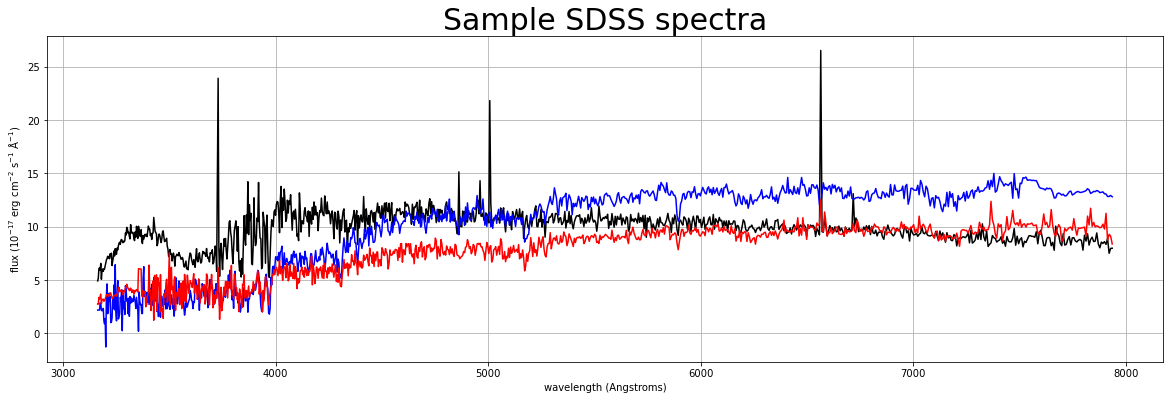

In [106]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.figure(figsize=(20, 6))
plt.grid()
plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra", fontsize=30)

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


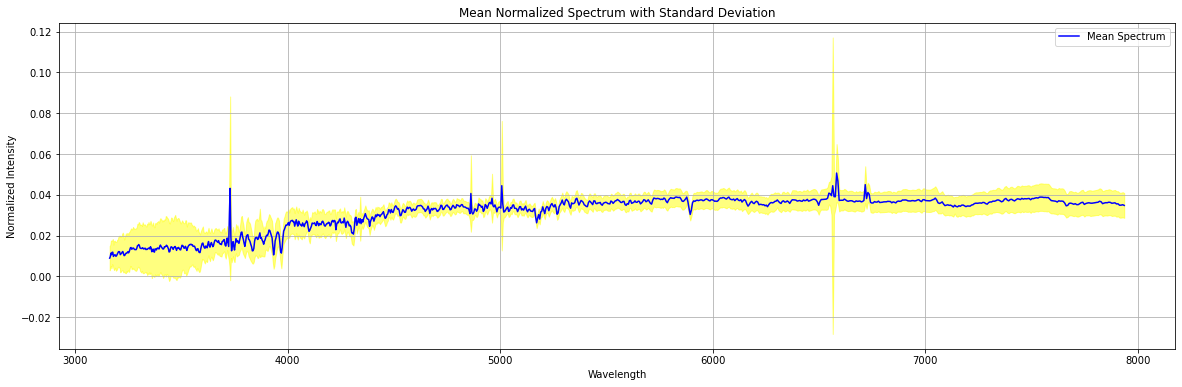

In [80]:
from sklearn.preprocessing import normalize

#in this part of the code we normalize each spectrum
normalized_spectra = normalize(data['spec_recons'], axis=1)

#In this part of the code we compute the mean and standard deviation of the normalized spectra
mean_spectrum = np.mean(normalized_spectra, axis=0)
std_spectrum = np.std(normalized_spectra, axis=0)

# we plot the mean spectrum along with the standard deviation
wavelengths = data['wavelength']

plt.figure(figsize=(20, 6))
plt.plot(wavelengths, mean_spectrum, label='Mean Spectrum', color='blue')
plt.fill_between(wavelengths, mean_spectrum - std_spectrum, mean_spectrum + std_spectrum, color='yellow', alpha=0.5)
plt.title('Mean Normalized Spectrum with Standard Deviation')
plt.xlabel('Wavelength')
plt.ylabel('Normalized Intensity')
plt.legend()
plt.grid(True)
plt.show()

Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?

A visualization for the mean normalized spectrum and standard deviation is given above. Observing this graph plot we can say that the mean spectrum is a less noisy version of the data values. As we can see in the yellow shadow in the graph we can observe that it covers a whole lot of points which is very noisy, so thorugh the use of the mean spectrum we can simplify the plot. As we can see the greates variation is observed at the point with the highest peak which is approximately at 6600. Based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra", this is where hydrogen absorbs and emits photons. It has the highest variation due to its abundance in the universe.



#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


Starting the second part of this activity i used codes provided in https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html to make most of the codes

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_projected = pca.fit_transform(normalized_spectra) 

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

4000


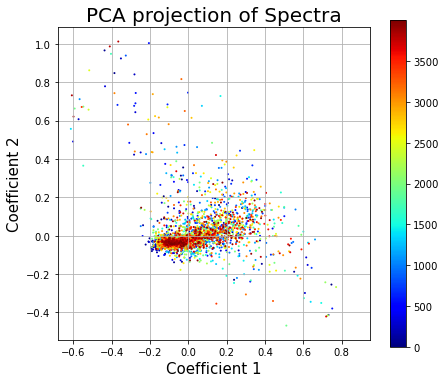

In [102]:
pl.figure(figsize=(7,6))
y = np.arange(4000)
pl.scatter(X_projected[:, 0], X_projected[:, 1], c=y, s=4, lw=0, cmap=pl.cm.jet)
pl.colorbar()
pl.xlabel('Coefficient 1',fontsize=15)
pl.ylabel('Coefficient 2',fontsize=15)
pl.axis('square')
print(len(X_projected))
pl.title('PCA projection of Spectra',fontsize=20)
plt.grid()
pl.show()

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

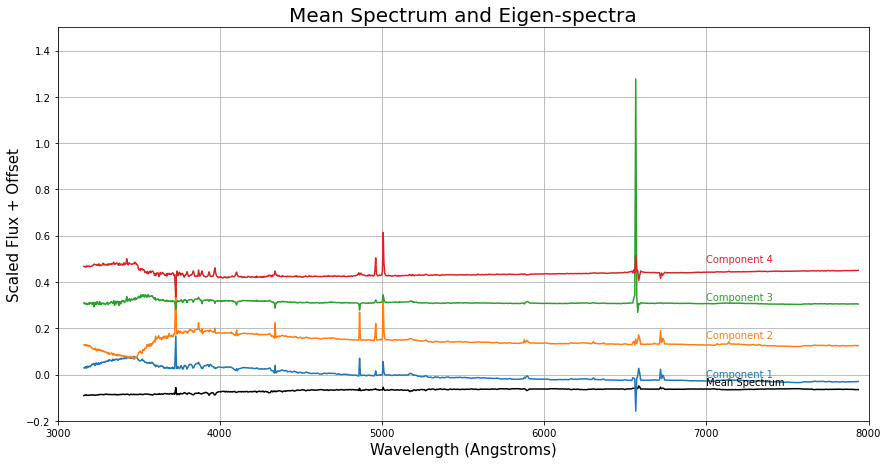

In [103]:
pl.figure(figsize=(12,6))
pl.plot(wavelengths, mean_spectrum-0.10, color ="black", label="Mean Spectrum")
pl.text(7000,0.055-0.10, "Mean Spectrum", color="black")
for i in range(4):
    l = pl.plot(wavelength, pca.components_[i] + 0.155 * i, label = ("component" + str(1+i)))
    c = l[0].get_color()
    
    pl.text(7000, -0.01 + 0.165 * i, "Component %i" % (i + 1), color=c)
pl.tight_layout()
pl.ylim(-0.2,1.5)
pl.xlabel('Wavelength (Angstroms)',fontsize=15)
pl.ylabel('Scaled Flux + Offset',fontsize=15)
pl.title('Mean Spectrum and Eigen-spectra',fontsize=20)
pl.xlim(3000,8000)
plt.grid()
plt.show()